# Coding Assignment - 2
## MATH-GA 2805 Trends in Sell-Side Modelling
#### Abhishek Kulkarni (ask9103)
#### Lavaneesh Sharma (lss8875)

********

**Consider a market where we have established at time $0$ (e.g., by looking at quoted swap and futures prices) that the risk-free forward interest rate curve is given by - 
$$f(0, t) = a + b · t$$
for two positive constants $a$ and $b$.**

## Question 1
**Derive an analytical expression for the time $0$ discount function $P(0,t)$, for any $t \geq 0$. Show your work.**

We define the time $t$ discount curve $P(t,.)$ at time $t$ as -
$$P(t,T) = e^{-\int_{t}^{T}f(t,u)du}$$

Using the given forward rate curve, 

$$
\begin{align*}
P(0,t) &= e^{-\int_{0}^{t} (a + b.u) du} \\
\therefore \; P(0,t) &= e^{-(at + \frac{bt^{2}}{2})}
\end{align*}
$$

*******

**We now introduce the 2-factor model covered in Lecture $7$. We recall that the model is specified by parameters $\sigma_{r}, c, \kappa_{2}, \rho_{\infty}$.**

## Question 2

**Compute an analytical expression for formula $(10)$ in Lecture $7$, thereby establishing the reconstitution formula the relates $P(t,T)$ to the state of $x(t) = (x_{1}(t), x_{2}(t))^{T}.$ Show your work.**

We derive an expression of $P(t,T)$ which is a general expression of the discount function that is used in the *SwapPricer* class
The reconstitution formula $F$ for $P(t,T)$ is given by -

$$
F(t,T,x(t)) = P(t,T) = \frac{P(0,T)}{P(0,t)}e^{A(t,T)+C(t,T)^{T}x(t))}
$$

where the constituents of the above integral are given by -

$$
C(t,T)=-\int_{t}^{T}M(t,u)du
$$



$$
M(t,u)^{T}=\begin{bmatrix}
   1  &
   e^{-k_{2}(T-t)}
   \end{bmatrix} 
$$



$$
G(t,T)=-C(t,T)=\int_{t}^{T}M(t,u)du=\int_{t}^{T} \begin{bmatrix}
   1  \\
   e^{-k_{2}(u-t)}
   \end{bmatrix} du
$$



$$
G(t,T)= \begin{bmatrix}
   T-t  \\
  \frac{-1}{k_{2}} e^{-k_{2}(T-t)}+\frac{1}{k_{2}} 
   \end{bmatrix} 
$$

$$
q(t) = \begin{pmatrix}
\sigma_{1} & \rho_{x}\sigma_{1}\sigma_{2}e^{\kappa_{2}t} \\
\rho_{x}\sigma_{1}\sigma_{2}e^{\kappa_{2}t} & \sigma_{2}e^{\kappa_{2}}t 
\end{pmatrix}
$$

$$y(t) = B(t)\Big{(}\int_{0}^{t}q(u)^{T}q(u)du \Big{)}B(t)$$

Substituting the matrix for $q(t)$ in the above equation we get,

$$
\begin{align*}
y(t) &= B(t)\Big{(}\int_{0}^{t}  \begin{bmatrix}
   \sigma_{1}  &
   p_{x}\sigma_{1}\sigma_{2}e^{k_{2}u} \\
  p_{x}\sigma_{1}\sigma_{2}e^{k_{2}u}  & 
  \sigma_{2}e^{k_{2}u}
   \end{bmatrix} \begin{bmatrix}
   \sigma_{1}  &
   p_{x}\sigma_{1}\sigma_{2}e^{k_{2}u} \\
  p_{x}\sigma_{1}\sigma_{2}e^{k_{2}u}  & 
  \sigma_{2}e^{k_{2}u}
   \end{bmatrix} du \Big{)} B(t) \\
y(t) &= B(t)\Big{(}\int_{0}^{t}  \begin{bmatrix}
   \sigma_{1}^2+p_{x}^2\sigma_{1}^2\sigma_{2}^2e^{2k_{2}u}  &
   p_{x}\sigma_{1}^2\sigma_{2}e^{k_{2}u} + p_{x}\sigma_{1}\sigma_{2}^2e^{2k_{2}u} \\
  p_{x}\sigma_{1}^2\sigma_{2}e^{k_{2}u} +  p_{x}\sigma_{1}\sigma_{2}^2e^{2k_{2}u}  &
   p_{x}^2\sigma_{1}^2\sigma_{2}^2e^{2k_{2}u} + \sigma_{2}^2e^{2k_{2}u}
  \end{bmatrix} du \Big{)} B(t) \\
y(t) &= B(t)\Big{(} \begin{bmatrix}
   \sigma_{1}^2t+\frac{1}{2k_{2}}p_{x}^2\sigma_{1}^2\sigma_{2}^2(e^{2k_{2}t}-1)  &
   \frac{1}{k_{2}}p_{x}\sigma_{1}^2\sigma_{2}(e^{k_{2}t}-1)+\frac{1}{2k_{2}}p_{x}\sigma_{1}\sigma_{2}^2(e^{2k_{2}t}-1)\\
  \frac{1}{k_{2}} p_{x}\sigma_{1}^2\sigma_{2}(e^{k_{2}t}-1) +  \frac{1}{2k_{2}}p_{x}\sigma_{1}\sigma_{2}^2(e^{2k_{2}t}-1)  &
   \frac{1}{2k_{2}} p_{x}^2\sigma_{1}^2\sigma_{2}^2(e^{2k_{2}t}-1) + \frac{1}{2k_{2}}\sigma_{2}^2(e^{2k_{2}t}-1)
  \end{bmatrix} \Big{)} B(t)
\end{align*}
$$


We know that - $
B(t) = \begin{bmatrix}
   1  &
   0\\
 0  &
   e^{-k_{2}t}
  \end{bmatrix}
$


Substituting the matrix for $B(t)$ in the above equation we get,

$$
\begin{align*}
y(t) &= \begin{bmatrix}
   1  &
   0\\
 0  &
   e^{-k_{2}t}
  \end{bmatrix} \Big{(} \begin{bmatrix}
   \sigma_{1}^2t+\frac{1}{2k_{2}}p_{x}^2\sigma_{1}^2\sigma_{2}^2(e^{2k_{2}t}-1)  &
   \frac{1}{k_{2}}p_{x}\sigma_{1}^2\sigma_{2}(e^{k_{2}t}-1)+\frac{1}{2k_{2}}p_{x}\sigma_{1}\sigma_{2}^2(e^{2k_{2}t}-1)\\
  \frac{1}{k_{2}} p_{x}\sigma_{1}^2\sigma_{2}(e^{k_{2}t}-1) +  \frac{1}{2k_{2}}p_{x}\sigma_{1}\sigma_{2}^2(e^{2k_{2}t}-1)  &
   \frac{1}{2k_{2}} p_{x}^2\sigma_{1}^2\sigma_{2}^2(e^{2k_{2}t}-1) + \frac{1}{2k_{2}}\sigma_{2}^2(e^{2k_{2}t}-1)
  \end{bmatrix} \Big{)}\begin{bmatrix}
   1  &
   0\\
 0  &
   e^{-k_{2}t}
  \end{bmatrix} \\
y(t) &= \Big{(} \begin{bmatrix}
   \sigma_{1}^2t+\frac{1}{2k_{2}}p_{x}^2\sigma_{1}^2\sigma_{2}^2(e^{2k_{2}t}-1)  &
   \frac{1}{k_{2}}p_{x}\sigma_{1}^2\sigma_{2}(e^{k_{2}t}-1)+\frac{1}{2k_{2}}p_{x}\sigma_{1}\sigma_{2}^2(e^{2k_{2}t}-1)\\
  \frac{1}{k_{2}} p_{x}\sigma_{1}^2\sigma_{2}(1-e^{-k_{2}t}) +  \frac{1}{2k_{2}}p_{x}\sigma_{1}\sigma_{2}^2(e^{k_{2}t}-e^{-k_{2}t})  &
   \frac{1}{2k_{2}} p_{x}^2\sigma_{1}^2\sigma_{2}^2(e^{k_{2}t}-e^{-k_{2}t}) + \frac{1}{2k_{2}}\sigma_{2}^2(e^{k_{2}t}-e^{-k_{2}t})
  \end{bmatrix} \Big{)}\begin{bmatrix}
   1  &
   0\\
 0  &
   e^{-k_{2}t}
  \end{bmatrix} \\
y(t) &= \begin{bmatrix}
   \sigma_{1}^2t+\frac{1}{2k_{2}}p_{x}^2\sigma_{1}^2\sigma_{2}^2(e^{2k_{2}t}-1)  &
   \frac{1}{k_{2}}p_{x}\sigma_{1}^2\sigma_{2}(1-e^{-k_{2}t})+\frac{1}{2k_{2}}p_{x}\sigma_{1}\sigma_{2}^2(e^{k_{2}t}-e^{-k_{2}t})\\
  \frac{1}{k_{2}} p_{x}\sigma_{1}^2\sigma_{2}(1-e^{-k_{2}t}) +  \frac{1}{2k_{2}}p_{x}\sigma_{1}\sigma_{2}^2(e^{k_{2}t}-e^{-k_{2}t})  &
   \frac{1}{2k_{2}} p_{x}^2\sigma_{1}^2\sigma_{2}^2(1-e^{-2k_{2}t}) + \frac{1}{2k_{2}}\sigma_{2}^2(1-e^{-2k_{2}t})
  \end{bmatrix} \\
\therefore \; y(t) &= \begin{bmatrix}
   \sigma_{1}^2t+\frac{1}{2k_{2}}p_{x}^2\sigma_{1}^2\sigma_{2}^2(e^{2k_{2}t}-1)  &
   \frac{1}{k_{2}}p_{x}\sigma_{1}\sigma_{2}[\sigma_{1}+\frac{\sigma_{2}}{2}e^{k_{2}t}-(\sigma_{1}+\frac{\sigma_{2}}{2})e^{-k_{2}t}] \\
  \frac{1}{k_{2}}p_{x}\sigma_{1}\sigma_{2}[\sigma_{1}+\frac{\sigma_{2}}{2}e^{k_{2}t}-(\sigma_{1}+\frac{\sigma_{2}}{2})e^{-k_{2}t}] &
   \frac{\sigma_{2}^2}{2k_{2}} (p_{x}^2\sigma_{1}^2+1)(1-e^{-2k_{2}t})
  \end{bmatrix} 
\end{align*}
$$

We know that the dynamics for $x(t) = (x_{1}(t),x_{2}(t))^{T}$ are mean-reverting Gaussian, given by -

$$
dx(t) = (y_{t}\mathbf{1}-kx(t))dt+\sigma_{x}^{*T}dW_{t}^{*}
$$

where the mentioned quantities are given by -

$$
\mathbf{1}=(1,1)^{T}
$$


$$
k=\begin{bmatrix}
   0  &
   0 \\
  0 &
   k_{2}
  \end{bmatrix}
$$


$$
\sigma_{x}^{*}=\begin{bmatrix}
   \sigma_{1}  &
   0 \\
  0 &
   \sigma_{2}
  \end{bmatrix}
$$


$
dx(t) = \begin{bmatrix}
   \sigma_{1}^2t+\frac{1}{2k_{2}}p_{x}^2\sigma_{1}^2\sigma_{2}^2(e^{2k_{2}t}-1)  &
   \frac{1}{k_{2}}p_{x}\sigma_{1}\sigma_{2}[\sigma_{1}+\frac{\sigma_{2}}{2}e^{k_{2}}-(\sigma_{1}+\frac{\sigma_{2}}{2})e^{-k_{2}t}] \\
  \frac{1}{k_{2}}p_{x}\sigma_{1}\sigma_{2}[\sigma_{1}+\frac{\sigma_{2}}{2}e^{k_{2}t}-(\sigma_{1}+\frac{\sigma_{2}}{2})e^{-k_{2}t}] &
   \frac{\sigma_{2}^2}{2k_{2}} (p_{x}^2\sigma_{1}^2+1)(1-e^{-2k_{2}t})
  \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} -\begin{bmatrix}
   0  &
   0 \\
  0 &
   k_{2}
  \end{bmatrix} \begin{bmatrix}
   x_{1}(t) \\
   x_{2}(t)
  \end{bmatrix} dt+\begin{bmatrix}
   \sigma_{1}  &
   0 \\
  0 &
   \sigma_{2}
  \end{bmatrix} dW_{t}^{*} \\
$
$$
\begin{align*}
\therefore \; dx_{1}(t) &=
   [\sigma_{1}^2t+\frac{1}{2k_{2}}p_{x}^2\sigma_{1}^2\sigma_{2}^2(e^{2k_{2}t}-1)  +
   \frac{1}{k_{2}}p_{x}\sigma_{1}\sigma_{2}[\sigma_{1}+\frac{\sigma_{2}}{2}e^{k_{2}}-(\sigma_{1}+\frac{\sigma_{2}}{2})e^{-k_{2}t}]] dt+\sigma_{1} dW_{t}^{*} \\
\therefore \; dx_{2}(t) &=
   [\frac{1}{k_{2}}p_{x}\sigma_{1}\sigma_{2}[\sigma_{1}+\frac{\sigma_{2}}{2}e^{k_{2}t}-(\sigma_{1}+\frac{\sigma_{2}}{2})e^{-k_{2}t}] +
   \frac{\sigma_{2}^2}{2k_{2}} (p_{x}^2\sigma_{1}^2+1)(1-e^{-2k_{2}t}) -k_{2}x_{2}(t)]dt+\sigma_{2} dW_{t}^{*}
\end{align*}
$$

Since $y_{10}=y_{01}$, so we can simplify the expression for $y(t)$ as follows -
$$
y(t)= \begin{bmatrix}
   y_{00} &
   y_{01}\\
  y_{10}  &
   y_{11}
  \end{bmatrix} = \begin{bmatrix}
   y_{00} &
   y_{10}\\
  y_{10}  &
   y_{11}
  \end{bmatrix}
$$

In order to find the closed form expression for $P(t,T)$ we need to calculate $\frac{P(0,T)}{P(0,t)},\;A(t,T),\;C(t,T).x(t)$. The calculation for each term are as follows - 

Calculating $A(t,T)$ -

$
\begin{align*}
A(t,T) &=- \int_{t}^{T} M(t,u)^{T} y(t) G(t,u)  du \\
A(t,T) &=-\int_{t}^{T} \begin{bmatrix}
   1  &
   e^{-k_{2}(u-t)}
   \end{bmatrix}  \begin{bmatrix}
   y_{00} &
   y_{10}\\
  y_{10}  &
   y_{11}
  \end{bmatrix}  \begin{bmatrix}
   u-t  \\
  \frac{-1}{k_{2}} e^{-k_{2}(u-t)}+\frac{1}{k_{2}} 
   \end{bmatrix} du \\
A(t,T) &=- \int_{t}^{T} 
\begin{bmatrix}
y_{00}+y_{10}e^{-k_{2}(u-t)} & y_{10}+y_{11}e^{-k_{2}(u-t)}
  \end{bmatrix}  
  \begin{bmatrix}
   u-t  \\
  \frac{-1}{k_{2}} e^{-k_{2}(u-t)}+\frac{1}{k_{2}} 
   \end{bmatrix} du \\
A(t,T) &=- \int_{t}^{T} 
     (u-t)(y_{00}+y_{10}e^{-k_{2}(u-t)})-(\frac{1}{k_{2}}e^{-k_{2}(u-t)}-\frac{1}{k_{2}})(y_{10}+y_{11}e^{-k_{2}(u-t)})du \\
A(t,T) &= - 
     \frac{(u-t)^2}{2}y_{00}+y_{10}[\frac{-1}{k_{2}}[(u-t)+\frac{1}{k_{2}}]e^{-k_{2}(u-t)}]-\frac{1}{k_{2}}[\frac{y_{10}}{k_{2}}e^{-k_{2}(u-t)}-\frac{y_{11}}{2k_{2}^2}e^{-2k_{2}(u-t)}-y_{10}u-\frac{y_{11}}{k_{2}^2}e^{-k_{2}(u-t)}] \Big{|}_{u=t}^{u=T} \\
A(t,T) &= - 
     \frac{(u-t)^2}{2}y_{00}+y_{10}[\frac{-1}{k_{2}}[(u-t)+\frac{1}{k_{2}}]e^{-k_{2}(u-t)}-\frac{1}{k_{2}^2}e^{-k_{2}(u-t)}-\frac{u}{k_{2}}]-\frac{y_{11}}{k_{2}^2}[\frac{1}{2}e^{-2k_{2}(u-t)}-e^{-k_{2}(u-t)}] \Big{|}_{u=t}^{u=T} \\
A(t,T) &=- 
     \frac{(T-t)^2}{2}y_{00}+y_{10}[\frac{-(T-t)}{k_{2}}e^{-k_{2}(T-t)}-\frac{1}{k_{2}^2}e^{-k_{2}(T-t)}+\frac{1}{k_{2}^2}+\frac{T-t}{k_{2}}-\frac{1}{k_{2}^2}+\frac{e^{-k_{2}(T-t)}}{k_{2}^2}]-\frac{y_{11}}{2k_{2}^2}[(e^{-2k_{2}(T-t)}-1)-(2e^{-k_{2}(T-t)}-2)] \\
A(t,T) &=- 
     \frac{(T-t)^2}{2}y_{00}+y_{10}[\frac{-(T-t)}{k_{2}}e^{-k_{2}(T-t)}+\frac{T-t}{k_{2}}]-\frac{y_{11}}{2k_{2}^2}[(e^{-2k_{2}(T-t)}-1)-(2e^{-k_{2}(T-t)}-2)] \\
\therefore \; A(t,T) &=- 
     \frac{(T-t)^2}{2}y_{00}-y_{10}\frac{1}{k_{2}}(T-t)(1-e^{-k_{2}(T-t)})-\frac{y_{11}}{2k_{2}^2}(1-e^{-k_{2}(T-t)})^2
\end{align*}
$

Calculating $C(t,T).x(t)$ -

$
\begin{align*}
C(t,T)^{T}x(t) &= \begin{bmatrix}
   (T-t)  &
  \frac{-1}{k_{2}} e^{-k_{2}(T-t)}+\frac{1}{k_{2}} 
   \end{bmatrix} \begin{bmatrix}
   x_{1}(t)  \\
  x_{2}(t)
   \end{bmatrix} \\
\therefore \; C(t,T)^{T}x(t) &= (T-t)x_{1}(t)+\frac{1}{k_{2}}(1-e^{k_{2}(T-t)})x_{2}(t) \\
\end{align*}
$

Calculating $\frac{P(0,T)}{P(0,t)}$ -
$$\frac{P(0,T)}{P(0,t)}=e^{-a(T-t)-\frac{b}{2}(T^2-t^2)}$$

**Final Result for $P(t,T)$ -**

$
\begin{align*}
F(t,T,x(t)) &= \frac{P(0,T)}{P(0,t)}e^{A(t,T)+C(t,T)^{T}x(t))} \\
\therefore \; F(t,T,x(t)) &= P(t,T) = e^{-a(T-t)-\frac{b}{2}(T^2-t^2)} e^{-
     \frac{(T-t)^2}{2}y_{00}-y_{10}\frac{1}{k_{2}}(T-t)(1-e^{-k_{2}(T-t)})-\frac{y_{11}}{2k_{2}^2}(1-e^{-k_{2}(T-t)})^2+(T-t)x_{1}(t)+\frac{1}{k_{2}}(1-e^{k_{2}(T-t)})x_{2}(t)}
\end{align*}
$

*****

**We now want to simulate the process for $x(t)$ on a discrete time grid ${t_{j}}$ that spans the horizon $[0, 10yrs]$. We also fix all our model constants to $a = 2.5\%, b = 0.2\%, \sigma_{r} = 2\%, c = 40\%, \kappa_{2} = 5\%, \rho_{\infty} = 40\%$.**

## Question 3

**Assume that the time grid has weekly spacing: $t_{0} = 0, t_{1} = 1/52, t_{2} = 2/52, ...$ etc. Document in detail the simulation algorithm you are using, and use it to draw $10$ independent paths of $x(t)$ on the monthly grid, with each path ending at the 10-year point. Graph these $10$ paths (one graph for $x1(t)$ and one graph for $x2(t)$).**

### Documentation of the Algorithm 

In order to generate the $N$ simulations of swap prices at each time instant of observation period, we create a class named **SwapPricer**.

Inputs to **SwapPricer** are - $a, b, c, \rho_{\infty}, \sigma_{r}, \kappa_{2}, N, T, ts$ \
where, \
$N$: number of simulations or paths to be generated for the swap prices, \
$T$: Array of payment dates of swap (in yrs)
$ts$: Array containing dates of calculating swap prices (daily/weekly/monthly grids)

#### Class Functions - 
**y_mat:** \
Input/s: Time instant ($t$)  \
Output/s: Values $y_{00}, y_{01}, y_{10}, y_{11}$ of the matrix $y(t)$

**simulations:** \
Input/s: None \
Output/s: Returns two arrays each containing $N$ arrays of simulated values for $x_{1}(t) \;\& \;x_{2}(t)$ respectively for the length of our observation interval

**Plot:** \
Input/s: $x_{1}(t) \;\& \;x_{2}(t)$ \
Output/s: Plots all simulated values of $x_{1}(t) \;\& \;x_{2}(t)$ respectively over the observation period

**A_vec:** \
Input/s: $t$ \
Output/s: Returns an array of $A(t,T_{i})$ at each $t$ considering all remaining future payment dates

**Pr:** \
Input/s: $t$, $x_{1}(t) \;\& \;x_{2}(t)$ \
Output/s: Returns values of discount function values $P(t,T)$ at each $t$ for all remaining future payments

**spot_rate:** \
Input/s: $x_{1}(t) \;\& \;x_{2}(t)$ \
Output/s: Returns $N$ arrays of simulated spot rates for each $x_{1} \;\& \;x_{2}$

**beta:** \
Input/s: $t, x_{1}(t) \;\& \;x_{2}(t)$ \
Output/s: Returns the continuous compounding discount factor from time $t=0$ till $t=t$

**StubVal:** \
Input/s: $t, x_{1}(t) \;\& \;x_{2}(t)$ \
Output/s: Returns an array of stub values at each $t$ according the formula metioned in accompanying theory

**SwapVal:** \
Input/s: $x_{1}(t) \;\& \;x_{2}(t), c$ \
Output/s: Returns an array with swap prices at each $t$ in our observation period for a given payment $c$

#### Steps to execute Algorithm - 
1. Define an object (instance) of the class SwapPricer by providing the above mentioned inputs
2. Create two variables (arrays) for $x1 \;\& \;x2$ by calling the *simulations* function of SwapPricer
3. Pass the above arrays of $x1 \;\& \;x2$ along with the periodic payment value $c$ to the *SwapVal* function to generate $N$ arrays of swap prices for the entire observation period 

#### Explanation - 

* The algorithm begins by generating simulated paths for $x_{1}(t)\;\&\;x_{2}(t)$ using Euler's discretization of the differential equation derived in Q2. These simulated values of $x_{1}(t)\;\&\;x_{2}(t)$ are passed to the *SwapVal* and rest of the supporting functions of the class
* Once the *SwapVal* function is called, it iterates over our observation period (ts/te). For each $t$ in our grid, it invokes the *Pr* function of SwapPricer
* The *Pr* function creates an array of remaining payment dates of the swap and the time left for receiving each payment in the *T_t* array. For each $t$ in this array, it generates the $A(t,T)$ by invoking the *A_vec* function. All these calculations are repeated for the number of simulations *N* using the numpy.tile() function
* The *A_vec* function generates $y(t)$ matrix of each $t$ passed in it by the *Pr* function
* Using the *T_t* and *A_vec* arrays, *Pr* first calculates the discount term *P(0,T) / P(0,t)* using the function derived in Q1
* Using *T_t* array, we calculated the *CX* term for each t and using these values from the above two steps, the function *Pr* returns an array of discount function values $P(t,T)$ for each $t$ of the observation interval
* *SwapVal* then calculates the stub value if $t$ is not a payment date. This is done by invoking *spot_rates* function that returns the simulated paths of $r(t)$
* These values of $r(t)$ are passed in the discount factor calculating function *beta*. Then, as per definition of stub value *StubVal* function calculates this discount factor for $t$ and $T_{0}$ (the last payment date) and returns a ratio of these values respectively
* Finally *SwapVal* appends the sum of all discount function values for all $T_{i}$ and given $t$ muliplied with the coupon value c and delta, subtracts the stub value and adds the discount function value of the final swap payment to return an array of $N$ swap prices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, exp, pi
from scipy.optimize import fsolve
import random
from scipy.stats import norm

In [2]:
class SwapPricer:
    
    def __init__(self,a,b,c,rho_inf,sig_r,k2,N,T_,ts_):
        self.a       =  a
        self.b       =  b
        self.c       =  c
        self.rho_inf =  rho_inf
        self.sig_r   =  sig_r
        self.k2      =  k2
        self.sig1    =  self.c * self.sig_r
        self.v       =  np.sqrt((1/self.c)**2 - 1 - 2*((self.rho_inf/self.c) - 1))
        self.sig2    =  self.v * self.sig1
        self.px      =  ((self.rho_inf/self.c) - 1)/(self.v)
        self.N       =  N
        self.T_      =  T_
        self.ts_     =  ts_
        self.dt_     =  self.T_[1] - self.T_[0]
    
    
    def y_mat(self,t_):
        y1 = (self.sig1**2)*t_ + \
        ( ( (self.px**2) * (self.sig1**2) * (self.sig2**2) * (np.exp(2*self.k2*t_) - 1) ) / (2*self.k2) )   
        
        y2 = (((self.sig1**2)*(self.sig2)*self.px )*( np.exp(self.k2*t_) - 1 ) + \
              ( (self.sig2**2) * (self.sig1) * (self.px)) * (np.exp(2*self.k2*t_) - 1)) * np.exp(-self.k2*t_)
        
        y3 = y2
        
        y4 = (((self.sig2**2)*(1 - np.exp(-2*k2*t_)))/(2*self.k2)) + \
        (((self.px**2) * (self.sig1**2) * (self.sig2**2)) * (1 - np.exp(-2*self.k2*t_)))/(2*self.k2)
        
        return y1, y2, y3, y4
    
    
    def simulations(self):
        X1 = np.zeros((self.N,len(self.ts_)))
        X2 = np.zeros((self.N,len(self.ts_)))
        X1[:,0] = 0
        X2[:,0] = 0
        
        dt = self.ts_[1] - self.ts_[0]
        dWx1 = np.random.normal(loc = 0,scale=np.sqrt(dt),size=(self.N,len(self.ts_)-1))
        dWx2 = np.random.normal(loc = 0,scale=np.sqrt(dt),size=(self.N,len(self.ts_)-1))
        dWx2 = self.px*dWx1 + dWx2*np.sqrt(1 - (self.px)**2)
        
        for i in range(0,len(self.ts_)-1):
            l0,l1,l2,l3 = self.y_mat(self.ts_[i])
            X1[:,i+1] = X1[:,i] + (l0 + l1)*dt + self.sig1*dWx1[:,i]
            X2[:,i+1] = X2[:,i] + (l2 + l3 - (self.k2*X2[:,i]))*dt + self.sig2*dWx2[:,i]
        
        return X1,X2
    
    
    def Plot(self,x1_,x2_):
        figure, axis = plt.subplots(2,1)
        figure.set_figwidth(20)
        figure.set_figheight(10)
        
        for i in range(self.N):
            axis[0].plot(self.ts_,x1_[i,:])
        axis[0].set_title("Two Factor OU Process")
        axis[0].set_ylabel("X1")
        axis[0].set_xlabel("Years")
        axis[0].grid(True)

        for i in range(self.N):
            axis[1].plot(self.ts_,x2_[i,:])
        axis[1].set_xlabel("Years")
        axis[1].set_ylabel("X2")
        axis[1].set_title("Two Factor OU Process")
        axis[1].grid(True)
        plt.show()
    
    
    def A_vec(self,t_):
        v1, v2, v3, v4 = self.y_mat(t_)
        if t_ == self.T_[-1]:
            Ttemp = np.array([t_])
        else:
            Ttemp = self.T_[self.T_ > t_]
        ttemp = np.ones(len(Ttemp))*t_
        Tdelt = Ttemp - ttemp
        return -0.5*((Tdelt)**2)*v1 - \
        (v3/self.k2)*(Tdelt)*(1-np.exp(-self.k2*(Tdelt))) - \
    0.5*(v4/(self.k2)**2)*(1 - np.exp(-self.k2*(Tdelt)))**2
    
    
    def Pr(self,t_,x1_,x2_):
        if t_ == self.T_[-1]:
            Ttemp = np.array([t_])
        else:
            Ttemp = self.T_[self.T_ > t_]
        ttemp = np.ones(len(Ttemp))*t_
        T_t = np.tile(Ttemp - ttemp, (self.N,1))
        A = np.tile(self.A_vec(t_), (self.N,1))
        P_0T = np.tile(np.exp(-(self.a*Ttemp + self.b*(Ttemp**2)/2)), (self.N,1))
        P_0t = np.tile(np.exp(-(self.a*ttemp + self.b*(ttemp**2)/2)), (self.N,1))
        t_index = np.where(self.ts_==t_)[0][0]
        CX   = x1_[:,t_index].reshape((self.N,1))*(T_t) + \
        x2_[:,t_index].reshape((self.N,1))*((1 - np.exp(self.k2*(T_t)))) / (self.k2)
        
        return (P_0T / P_0t) * np.exp(A + CX)
    
    
    def spot_rate(self,x1_,x2_):
        f_0t = np.tile(self.a + self.b*self.ts_,(self.N,1))
        return f_0t + x1_ + x2_
    
    
    def beta(self,t_,x1_,x2_):
        #print("ts: ", ts)
        t_index = np.where(self.ts_==t_)[0][0]
        h = (t_-0)/(len(self.ts_[:t_index+1]))
        r = self.spot_rate(x1_,x2_)
        rt = r[:,:t_index+1]
        return np.exp((h/2)*(rt[:,0] + 2*np.sum(rt[:,1:len(rt)-1], axis=1) + rt[:,-1]))

    
    def StubVal(self,t_,x1_,x2_):
        if t_ in self.T_:
            return np.ones(self.N)
        else:    
            T0 = self.T_[self.T_ < t_][-1]
            return self.beta(t_,x1_,x2_) / self.beta(T0,x1_,x2_) 
    
    
    def SwapVal(self,x1_,x2_,c):
        swap = np.zeros((self.N,len(self.ts_)))
        for i in range(len(self.ts_)-1):
            disc_fact = self.Pr(self.ts_[i],x1_,x2_)
            agg_disc_fact = np.sum(disc_fact, axis=1) * c * self.dt_
            stub = self.StubVal(self.ts_[i],x1_,x2_)
            final_term = disc_fact[:,-1] 
            swap_value = agg_disc_fact - stub + final_term
            swap[:,i] = swap_value
        return swap
    

In [3]:
# MODEL PARAMETERS

a       = 2.5/100
b       = 0.2/100
sig_r   = 2/100
c       = 40/100
k2      = 5/100
rho_inf = 4/100

In [4]:
# OBSERVATION GRID

ts = np.arange(0,521)/52   # WEEKLY GRID

In [5]:
# SWAP DEFINITION

notional = 50000000         # SWAP NOTIONAL
maturity = 10               # MATURITY (in Yrs.)
T = np.linspace(0,10,21)    # PAYMENT DATES (in Yrs.)

In [6]:
# NO OF SIMULATIONS

N = 10

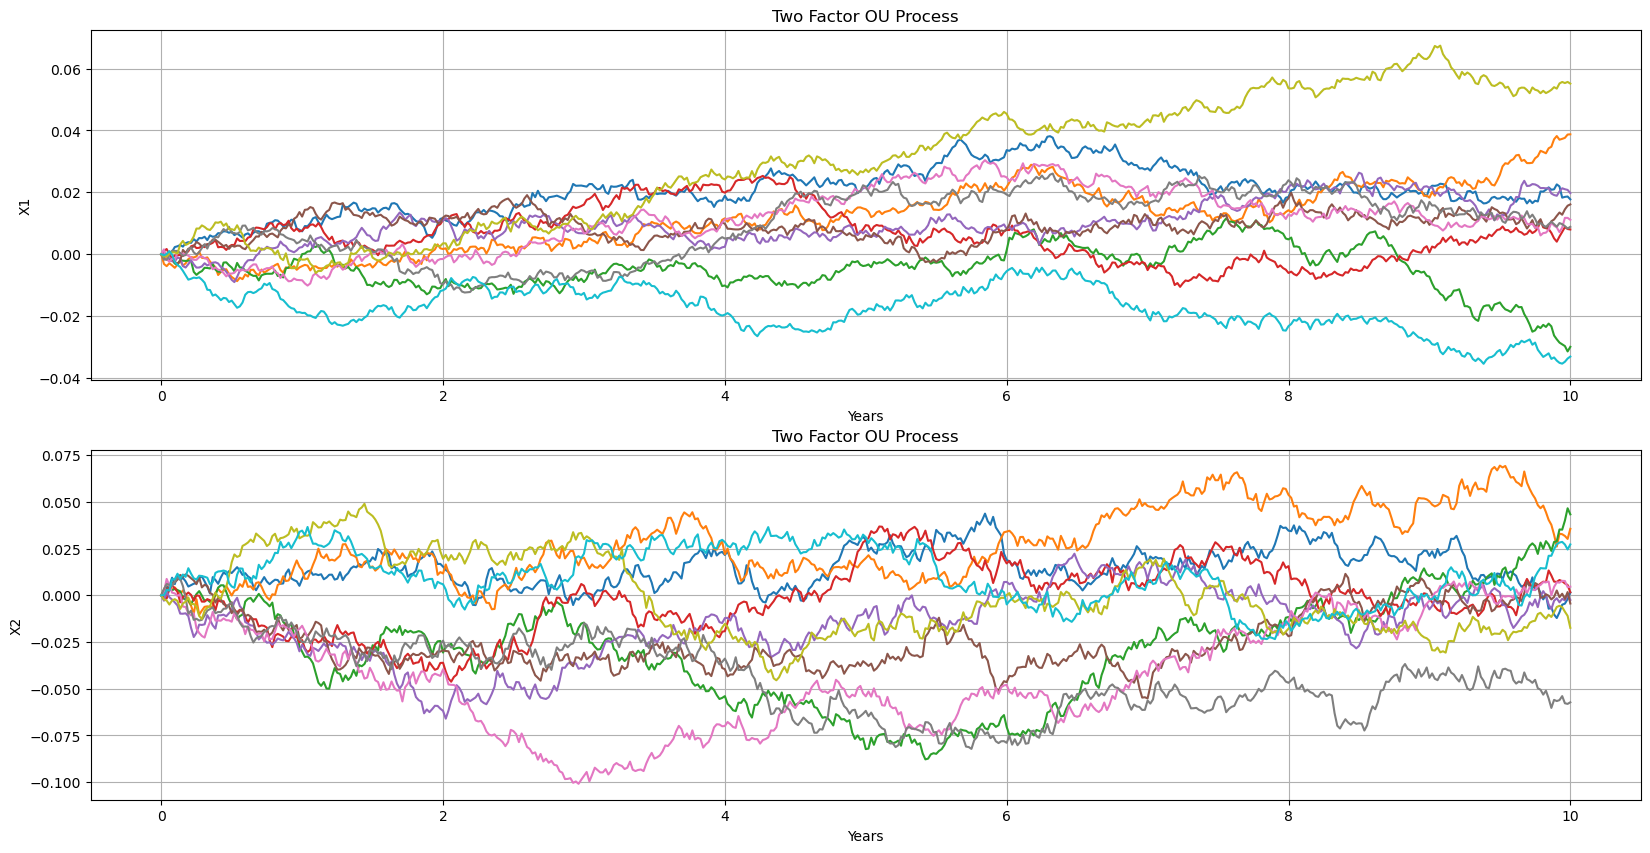

In [7]:
model1 = SwapPricer(a,b,c,rho_inf,sig_r,k2,N,T,ts)
x1, x2 = model1.simulations()
model1.Plot(x1,x2)

****

**We now introduce a 10-year swap with a fixed coupon $h$ and a floating coupon being computed of the floating index curve $P_{L}$, as explained in Lecture $7$. We assume that the swap makes payments semi-annually. Also assume that the notional of the swap is $\$50$ million.**

## Question 4

**Graph the time $0$ value of both the payer and receiver versions of the 10-yr swap as a function of $h$, with $h$ varying from $0\%$ to $10\%$. There is a value of $h$ – known as the par coupon $h_{par}$ – that will make the time $0$ value of both payer and receiver swaps equal to zero. What is the value of $h_{par}$?**

In [8]:
h_ = np.linspace(0, .10, 101)

swap_vs_h = np.zeros(len(h_))
for i in range(len(h_)):
    swap_vs_h[i] = model1.SwapVal(x1,x2,h_[i])[0][0]
    
#swap_vs_h

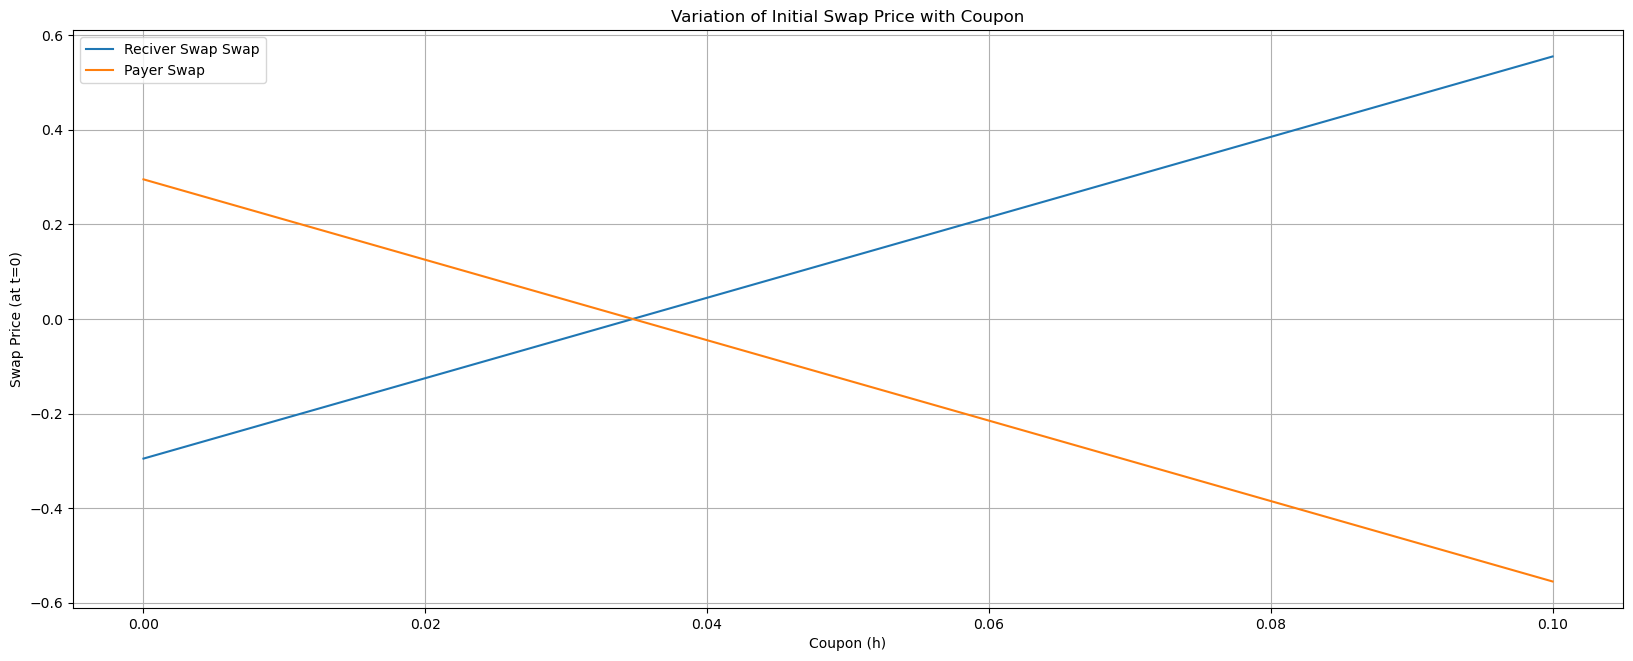

In [9]:
fig, axs = plt.subplots(figsize=(20, 7.5))
axs.set_title("Variation of Initial Swap Price with Coupon")
axs.set_ylabel("Swap Price (at t=0)")
axs.set_xlabel("Coupon (h)")
axs.plot(h_, swap_vs_h, label = "Reciver Swap Swap")
axs.plot(h_, -swap_vs_h , label = "Payer Swap")
axs.legend()
axs.grid()

plt.show()

In [10]:
# FINDING h_par

def optimal_h(c):
    swap_price = model1.SwapVal(x1,x2,c)[0][0]
    return swap_price

h_par = fsolve(func=optimal_h, x0=0)[0]
print("Optimal value for coupon is :", h_par)

Optimal value for coupon is : 0.034721066827000255


To simulate paths of the spot rate $r$ from simulated paths of the two-dimensional factor $x(t)$, we can use

$$f(t,T) = f(0,T) + M(t,T)^{T}(x(t) + y(t)G(t,T))$$

after recalling that $r(t) = f(t,t):$

$$r(t) = f(0,t) + x_{1}(t) + x_{2}(t)$$

And we know from given information that -

$$f(0,t) = a + bt$$

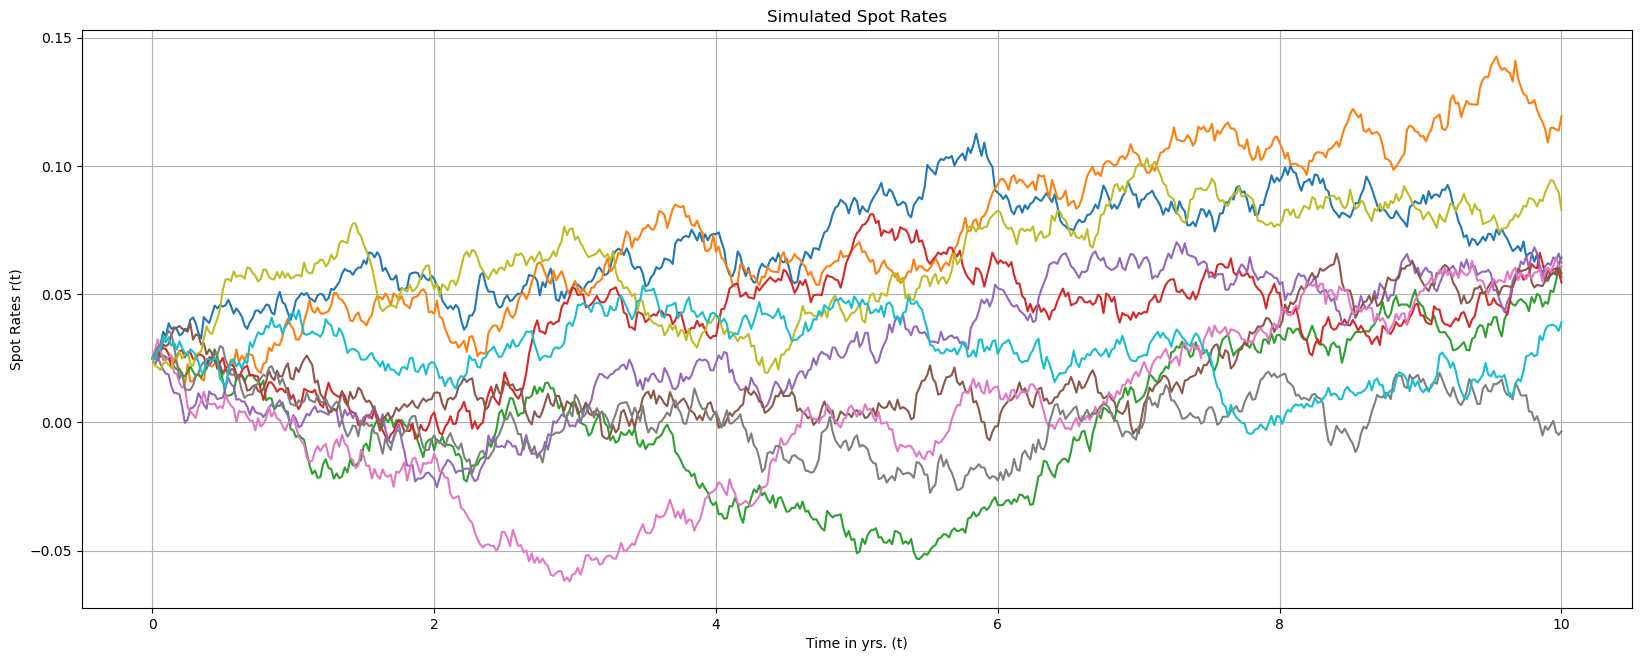

In [11]:
rates = model1.spot_rate(x1,x2)
plt.figure(figsize=(20,7.5))
plt.title("Simulated Spot Rates")
plt.xlabel("Time in yrs. (t)")
plt.ylabel("Spot Rates r(t)")
plt.grid(True)

for i in range(N):
    plt.plot(ts,rates[i])

plt.show()

****

## Question 5

**Using the result of Q2, translate the $10$ paths of $x(t)$ in Q3 into $10$ paths of the payer and receiver swaps, with the coupon $h$ set equal to $h_{par}$ (such that the time $0$ value of the swap paths all start at zero).**

We know that at time $t \in [T_{0},T_{1})$ that value (price) of a $\Delta$ period receiver swap with future payment date $T_{1},...,T_{N}$ is :
$$V_{rec}(t) = c \Delta \sum_{i=1}^{N}P(t,T_{i}) - \frac{\beta(t)}{\beta(T_{0})} + P(t,T_{N})$$

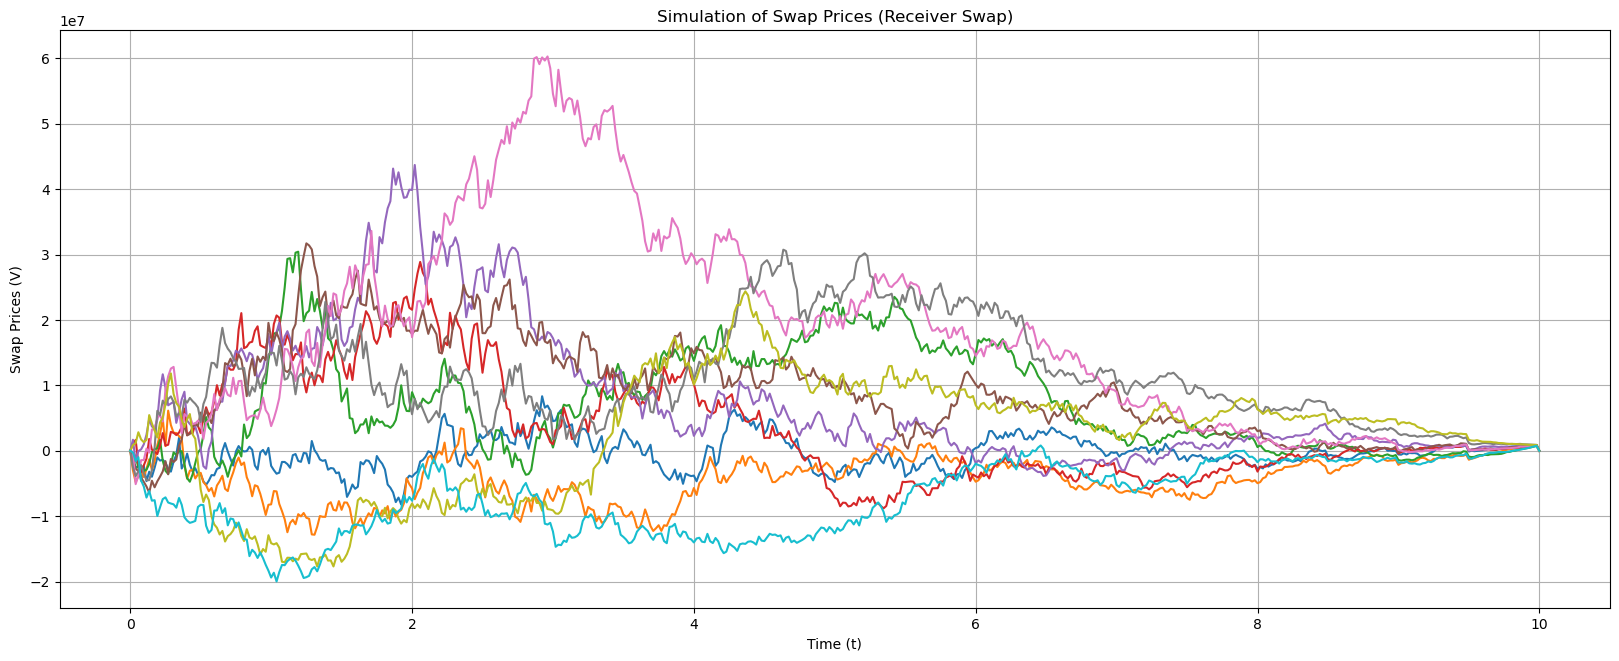

In [12]:
swap_prices = model1.SwapVal(x1,x2,h_par) * notional

plt.figure(figsize=(20,7.5))
plt.title("Simulation of Swap Prices (Receiver Swap)")
plt.xlabel("Time (t)")
plt.ylabel("Swap Prices (V)")
plt.grid(True)
for i in range(N):
    plt.plot(ts,swap_prices[i])
plt.show()

*******

## Question 6

**Using a time grid where each month is divided into $4$ buckets (so: roughly weekly, with $48$ buckets per year), use Monte Carlo simulation with $M = 30,000$ paths to estimate the expected exposure profiles for the payer and receiver swaps (with par coupon). Assume that there is no collateral. Graph the expected exposure profiles on a weekly grid out to $10$ years.**

In [13]:
# NO OF SIMULATIONS

N = 30000

In [14]:
# OBSERVATION GRID

te = np.arange(0,481)/48    # ASSUMING 48 WEEKS IN A YEAR

In [15]:
model2 = SwapPricer(a,b,c,rho_inf,sig_r,k2,N,T,te)
x1_2, x2_2 = model2.simulations()

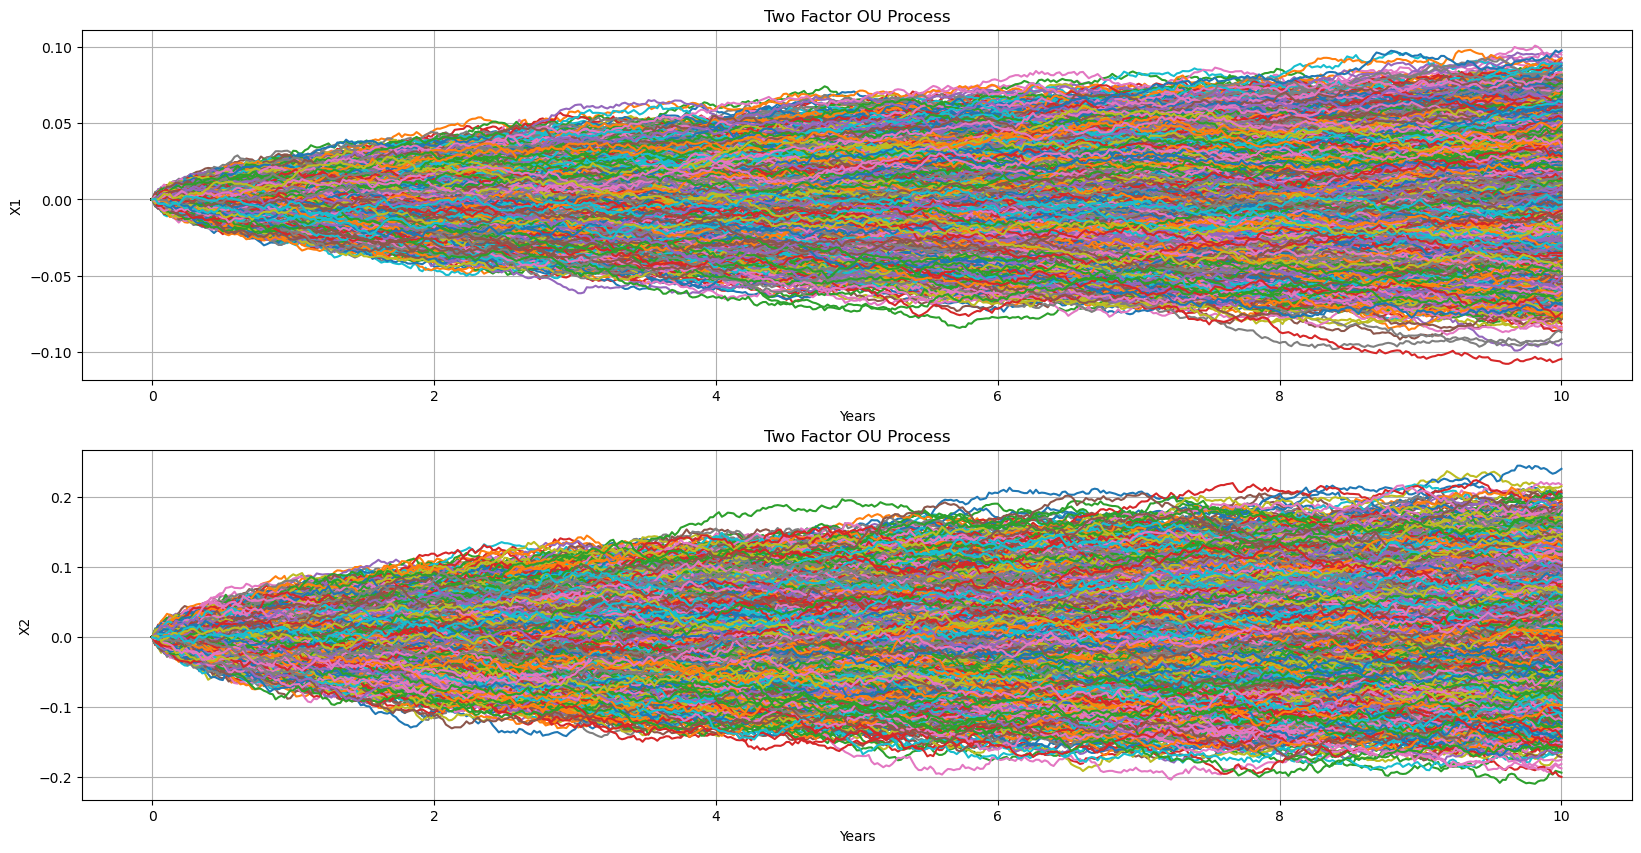

In [16]:
model2.Plot(x1_2,x2_2)

In [17]:
swap_prices2 = model2.SwapVal(x1_2,x2_2,h_par) * notional

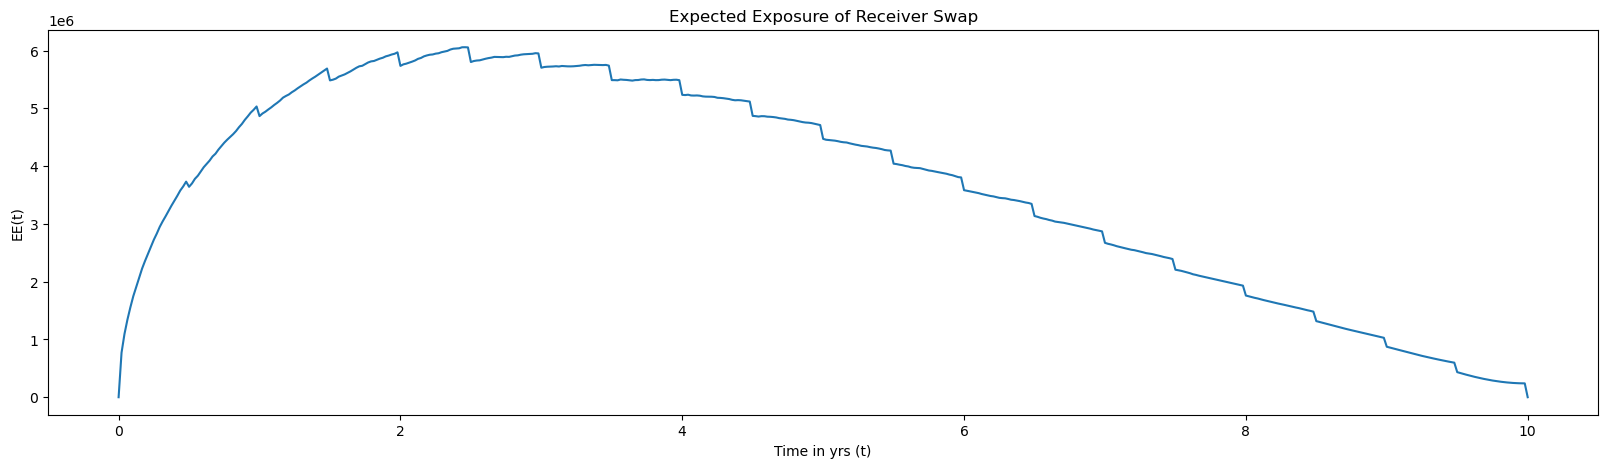

In [18]:
plt.figure(figsize=(20,5))
plt.title("Expected Exposure of Receiver Swap")
plt.xlabel("Time in yrs (t)")
plt.ylabel("EE(t)")
plt.plot(te, np.mean(np.maximum(swap_prices2,0),axis=0))
plt.show()

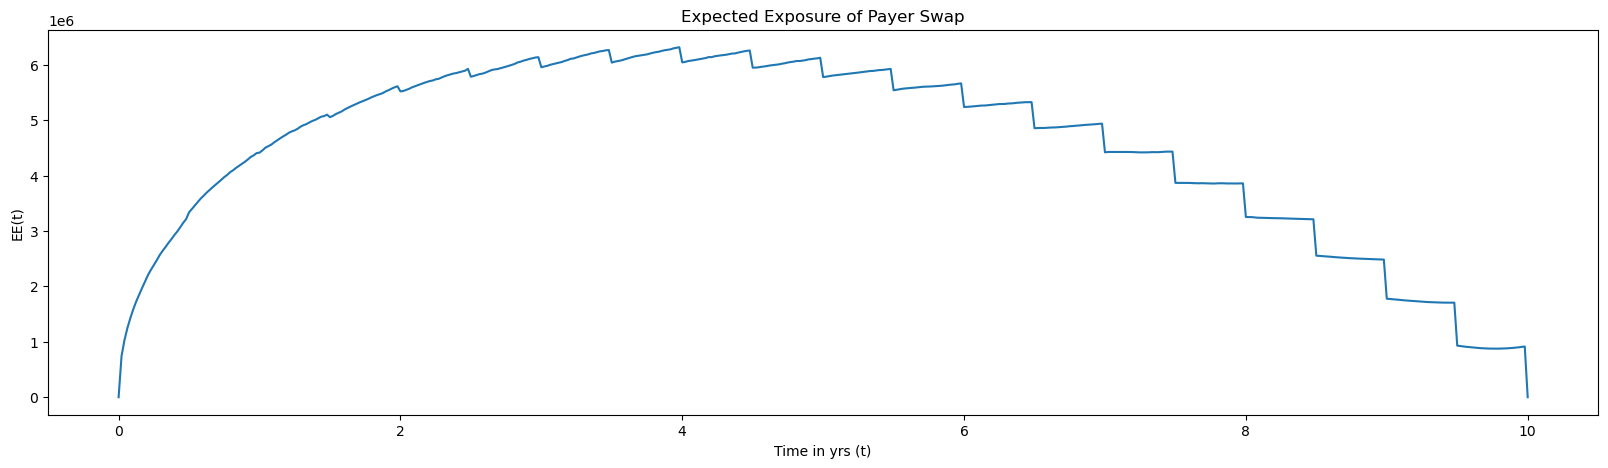

In [19]:
plt.figure(figsize=(20,5))
plt.title("Expected Exposure of Payer Swap")
plt.xlabel("Time in yrs (t)")
plt.ylabel("EE(t)")
plt.plot(te, np.mean(np.maximum(-swap_prices2,0),axis=0))
plt.show()

In [20]:
EE = np.zeros((len(te)))
for i in range(len(te)-1):
    EE[i] = np.mean(np.maximum(-(swap_prices2[:,i+1]-swap_prices2[:,i]),np.zeros((N))),axis = 0)

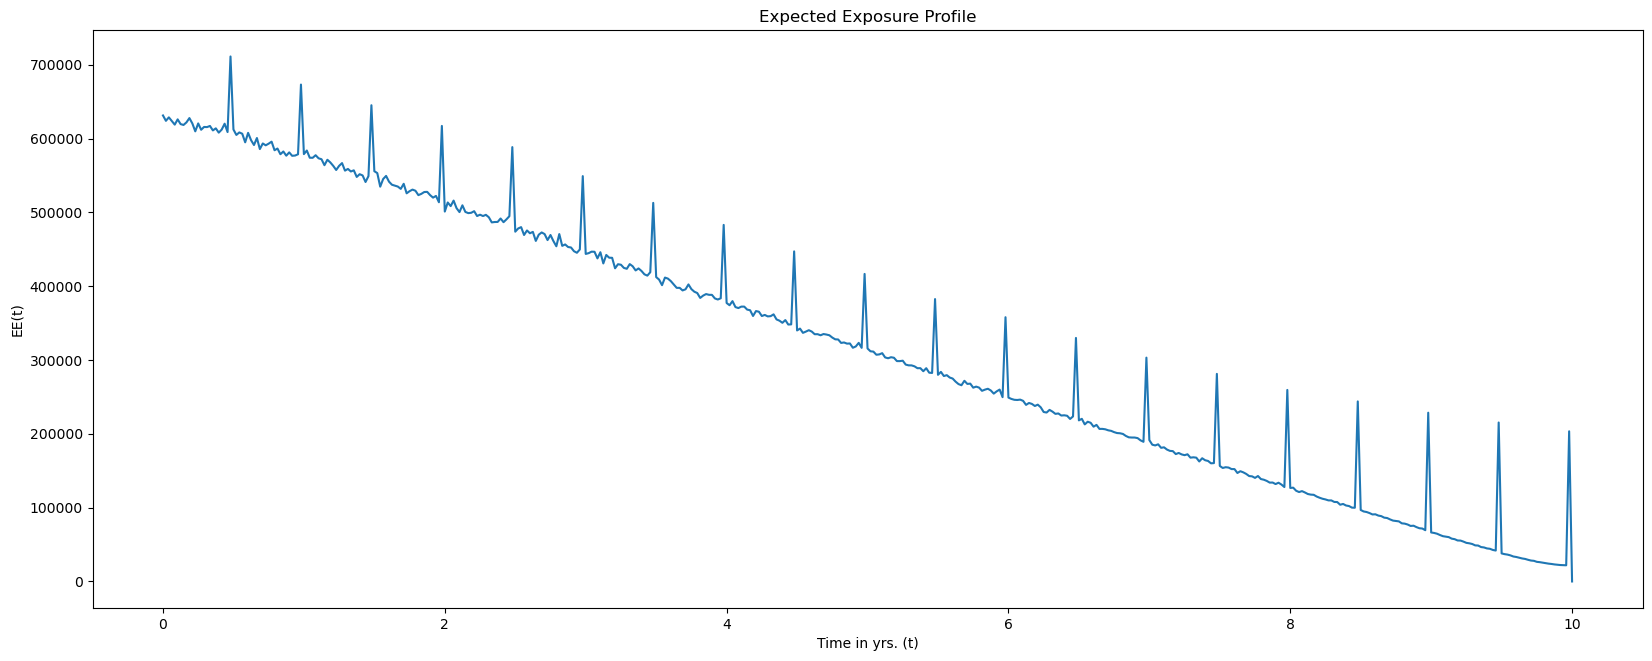

In [21]:
p = 0.99
Phi_p = (norm.pdf(norm.ppf(p)) - norm.ppf(p)*(1-p))*np.sqrt(2*pi)
plt.figure(figsize=(20,7.5))
plt.title("Expected Exposure Profile")
plt.xlabel("Time in yrs. (t)")
plt.ylabel("EE(t)")
plt.plot(te,Phi_p*EE*100)
plt.show()